# Mnist Digit Recognition 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("mnist_train.csv")
df_p = df
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


<IPython.core.display.Javascript object>

In [4]:
Y = df["label"].values
hg = np.unique(Y)
print("the unique values are", hg)

the unique values are [0 1 2 3 4 5 6 7 8 9]


<IPython.core.display.Javascript object>

In [5]:
df_1 = df.drop(columns=["label"])
df_1.shape

(60000, 784)

<IPython.core.display.Javascript object>

In [6]:
df_1.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [7]:
n = df.isnull().sum()
print(n[n != 0])

Series([], dtype: int64)


<IPython.core.display.Javascript object>

In [8]:
df_1 = df_1.values

<IPython.core.display.Javascript object>

In [9]:
df_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<IPython.core.display.Javascript object>

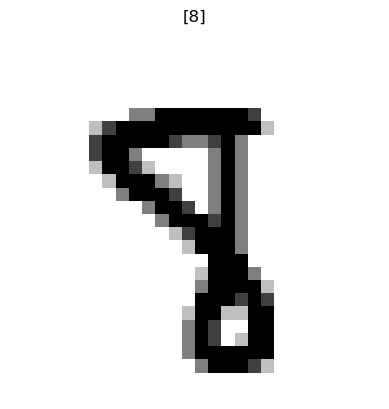

<IPython.core.display.Javascript object>

In [10]:
s = np.random.randint(0, 60000, size=1)
x = df_1[s].reshape(28, 28)
plt.imshow(x, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title(str(Y[s]))
plt.show()

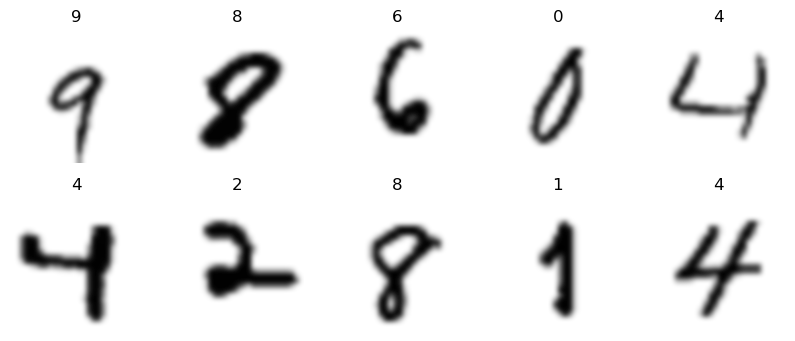

<IPython.core.display.Javascript object>

In [11]:
rand = np.random.randint(0, 60000, size=10)
num = []

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    r = df_1[rand[i]]
    num.append(Y[rand[i]])
    r = r.reshape(28, 28)
    ax.imshow(r, cmap=matplotlib.cm.binary, interpolation="bicubic")
    ax.axis("off")
    ax.set_title(str(num[i]))
plt.show()


Text(0.5, 1.0, 'Occurance of the Numbers')

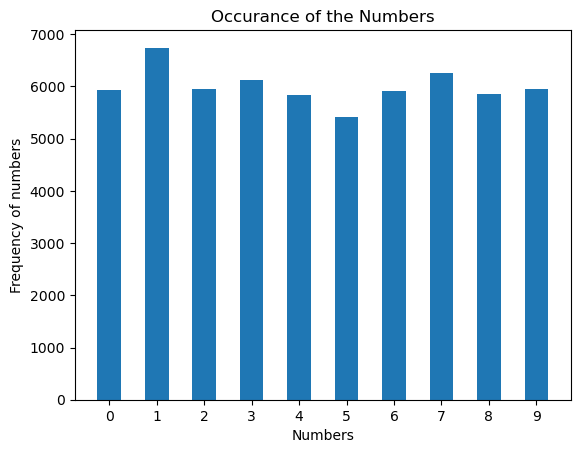

<IPython.core.display.Javascript object>

In [12]:
values, count = np.unique(Y, return_counts=True)
plt.bar(values, count, width=0.5)
plt.xlabel("Numbers")
plt.ylabel("Frequency of numbers")
plt.xticks(range(0, 10))
plt.title("Occurance of the Numbers")

Finding the nullvalues

In [13]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df_1, Y, test_size=0.1, random_state=0
)

<IPython.core.display.Javascript object>

In [14]:
Y.shape

(60000,)

<IPython.core.display.Javascript object>

In [15]:
pi = pd.DataFrame(df_p)
drop_pix_b = []
for col in df_p:
    if pi[col].max() == 0:
        pi.drop(columns=[col], inplace=True)
        drop_pix_b.append(col)
print("constantly the black pixels that have been removed are:{}".format(drop_pix_b))
drop_pix_w = []
for col in pi:
    if pi[col].min() == 255:
        pi.drop(columns=[col], inplace=True)
        drop_pix_w.append(col)
if len(drop_pix_w) == 0:
    print("\nThere are no columns consisting of entirely 255 ")
else:
    print(
        "constantly the white pixels that have been removed are:{}".format(drop_pix_w)
    )
pi.shape

constantly the black pixels that have been removed are:['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10', '1x11', '1x12', '1x17', '1x18', '1x19', '1x20', '1x21', '1x22', '1x23', '1x24', '1x25', '1x26', '1x27', '1x28', '2x1', '2x2', '2x3', '2x4', '2x25', '2x26', '2x27', '2x28', '3x1', '3x2', '3x27', '3x28', '4x1', '4x2', '4x28', '5x1', '6x1', '6x2', '7x1', '18x1', '21x1', '24x1', '24x2', '24x28', '25x1', '25x2', '25x28', '26x1', '26x2', '26x28', '27x1', '27x2', '27x3', '27x27', '27x28', '28x1', '28x2', '28x3', '28x4', '28x25', '28x26', '28x27', '28x28']

There are no columns consisting of entirely 255 


(60000, 718)

<IPython.core.display.Javascript object>

In [16]:
x = pi.drop(columns="label")

<IPython.core.display.Javascript object>

In [17]:
y = pi["label"].values

<IPython.core.display.Javascript object>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

<IPython.core.display.Javascript object>

## Standard scaling

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

<IPython.core.display.Javascript object>

In [20]:
from sklearn.metrics import accuracy_score


def acc_score(y_p):
    print(accuracy_score(y_p, y_test))

<IPython.core.display.Javascript object>

## Stratified cross validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)


def stratified_cross_validation(clf):
    li = []
    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(clf)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        li.append(n_correct / len(y_pred))
    print(li)

<IPython.core.display.Javascript object>

In [22]:
ps = []
rs = []
f1 = []

<IPython.core.display.Javascript object>

## Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


def Confusion_Matrix(ypredd):
    print(confusion_matrix(ypredd, y_test))
    ps.append(precision_score(y_test, ypredd, average="macro"))
    rs.append(recall_score(y_test, ypredd, average="macro"))
    f1.append(f1_score(y_test, ypredd, average="macro"))

<IPython.core.display.Javascript object>

## Stochastic Gradient Descent classifier

In [24]:
from sklearn.linear_model import SGDClassifier

sd = SGDClassifier(random_state=42, max_iter=10000)

<IPython.core.display.Javascript object>

In [25]:
%%time
sd.fit(X_train, y_train)

Wall time: 5min 6s


SGDClassifier(max_iter=10000, random_state=42)

<IPython.core.display.Javascript object>

In [26]:
y_pred = sd.predict(X_test)

<IPython.core.display.Javascript object>

In [27]:
acc_score(y_pred)

0.8996666666666666


<IPython.core.display.Javascript object>

## Support vector machine

In [28]:
from sklearn import svm

sv = svm.SVC(kernel="linear")

<IPython.core.display.Javascript object>

In [29]:
sv.fit(X_train, y_train)

SVC(kernel='linear')

<IPython.core.display.Javascript object>

In [30]:
y_pred2 = sv.predict(X_test)

<IPython.core.display.Javascript object>

In [31]:
acc_score(y_pred2)

0.9243333333333333


<IPython.core.display.Javascript object>

## Random forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

<IPython.core.display.Javascript object>

In [33]:
%%time
rf.fit(X_train1,y_train1)

Wall time: 41.5 s


RandomForestClassifier(random_state=42)

<IPython.core.display.Javascript object>

In [34]:
y_pred3 = rf.predict(X_test1)

<IPython.core.display.Javascript object>

In [35]:
acc_score(y_pred3)

0.9735


<IPython.core.display.Javascript object>

## Stratified Cross validation

For Stochastic gradient classifier

In [36]:
%%time
stratified_cross_validation(sd)

[0.8936111111111111, 0.9050555555555555, 0.9036111111111111]
Wall time: 9min 37s


<IPython.core.display.Javascript object>

Support vector machine

In [37]:
%%time
stratified_cross_validation(sv)

[0.9145555555555556, 0.9162222222222223, 0.9141666666666667]
Wall time: 9min 37s


<IPython.core.display.Javascript object>

Random
forest 

In [38]:
lit = []
for train_index, test_index in skfolds.split(X_train1, y_train1):
    clone_clf1 = clone(rf)
    X_train1_folds = X_train1[train_index]
    y_train1_folds = y_train1[train_index]
    X_test1_fold = X_train1[test_index]
    y_test1_fold = y_train1[test_index]
    clone_clf1.fit(X_train1_folds, y_train1_folds)
    y_pred1 = clone_clf1.predict(X_test1_fold)
    n_correct1 = sum(y_pred1 == y_test1_fold)
    lit.append(n_correct1 / len(y_pred1))
print(lit)

[0.9631666666666666, 0.9637222222222223, 0.9663333333333334]


<IPython.core.display.Javascript object>

## Confusion matrix

For Stochastic gradient classifier

In [39]:
cf_sgc = Confusion_Matrix(y_pred)

[[572   0   1   3   1   3   2   0   0   0]
 [  0 661   2   1   2   1   4   1   4   2]
 [  2   2 510  14   4   2   3   3   7   3]
 [  1   2  12 492   0   9   0   1  11   5]
 [  0   0   7   0 513   6   8   2   0  11]
 [  5   2   4  20   0 430  11   1  20   3]
 [  5   0   3   0   4   5 579   0   1   0]
 [  0   0   6   2   2   2   3 576   0  13]
 [ 20  21  41  44  29  55  21  23 540  53]
 [  0   0   0   7  10   5   0  18   1 525]]


<IPython.core.display.Javascript object>

For Support Vector Machine 

In [40]:
cf_svm = Confusion_Matrix(y_pred2)

[[591   0   3   2   0  10   6   0   5   2]
 [  0 676   9   4   1   1   4   2  11   2]
 [  1   3 533  17   4   2   5   6  14   5]
 [  0   1  16 527   2  20   0  12  13   8]
 [  3   0   5   1 530   6  10   6   2  21]
 [  4   1   3  16   2 456  10   0  23   1]
 [  6   0   1   0   3   5 591   0   1   0]
 [  0   1   8   3   6   2   1 587   3  24]
 [  0   6   7  11   1  10   4   2 508   5]
 [  0   0   1   2  16   6   0  10   4 547]]


<IPython.core.display.Javascript object>

For Random Forest

In [41]:
print(confusion_matrix(y_pred3, y_test1))
rf_p = precision_score(y_test1, y_pred3, average="macro")
rf_r = recall_score(y_test1, y_pred3, average="macro")
rf_f = f1_score(y_test1, y_pred3, average="macro")
ps.append(rf_p)
rs.append(rf_r)
f1.append(rf_f)

[[599   0   1   0   2   2   1   0   1   1]
 [  0 684   1   0   2   0   2   1   1   0]
 [  0   1 567   7   0   0   0   7   3   0]
 [  0   2   3 557   0   3   0   1   3   4]
 [  1   0   2   0 550   0   3   2   2   7]
 [  1   0   1   6   0 505   7   0   3   3]
 [  0   0   1   0   3   5 615   0   3   0]
 [  0   1   8   6   0   0   0 609   0   3]
 [  4   0   2   5   0   2   3   1 564   6]
 [  0   0   0   2   8   1   0   4   4 591]]


<IPython.core.display.Javascript object>

In [42]:
clf = [
    "Stocahstic Gradient Descent Classifier",
    "Support Vector Machine",
    "Random Forest",
]
data = {"Classifiers": clf, "Precision": ps, "Recall": rs, "F1_Score": f1}
ds = pd.DataFrame(data)
ds.index += 1

<IPython.core.display.Javascript object>

In [43]:
ds

,Classifiers,Precision,Recall,F1_Score
1,Stocahstic Gradient Descent Classifier,0.910147,0.897602,0.900610
2,Support Vector Machine,0.922979,0.922638,0.922572
3,Random Forest,0.972991,0.973138,0.973047


<IPython.core.display.Javascript object>

## Test Set

In [62]:
df2 = pd.read_csv("mnist_test.csv")

<IPython.core.display.Javascript object>

In [63]:
df_r = df2["label"]

<IPython.core.display.Javascript object>

In [64]:
df2.drop(columns="label", inplace=True)

<IPython.core.display.Javascript object>

In [65]:
df2.index.name = "Index"
df2

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [66]:
a = df2.values

<IPython.core.display.Javascript object>

In [67]:
b = a[0].reshape(28, 28)

<IPython.core.display.Javascript object>

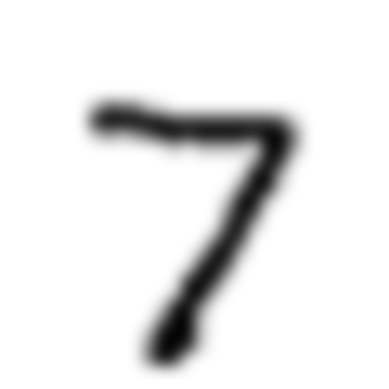

<IPython.core.display.Javascript object>

In [68]:
plt.imshow(b, cmap=matplotlib.cm.binary, interpolation="bicubic")
plt.axis("off")
plt.show()

In [72]:
test_x = df2.values
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<IPython.core.display.Javascript object>

### Classifying

In [73]:
result = rf.predict(test_x)

<IPython.core.display.Javascript object>

In [74]:
rdf = {"Predicted_labels": result}
dt = pd.DataFrame(rdf)
dt.index.name = "Index"
dto = pd.merge(df2, dt, on="Index")

<IPython.core.display.Javascript object>

In [75]:
dto

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,Predicted_labels
Index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


<IPython.core.display.Javascript object>

In [77]:
count = 0
for x in result:
    if result[x] == df_r[x]:
        count += 1
print(count)

10000


<IPython.core.display.Javascript object>